graphene like shape plotting test

In [10]:
import kwant
from math import sqrt

In [11]:
sin_30, cos_30 = (1 / 2, sqrt(3 / 2))

In [12]:
graphene = kwant.lattice.general([(1, 0), (sin_30, cos_30)], [(0, 0), (0, 1 / sqrt(3))])
# graphene = kwant.lattice.general([(1, 0), (sin_30, cos_30)], [(0, 0), (0, 1 / sqrt(3))])
a, b = graphene.sublattices

In [30]:
def make_system(r=10, w=2.0, pot=0.1):
    
    def circle(pos):
        x, y = pos
        return x ** 2 + y ** 2 < r ** 2
    
    sys = kwant.Builder()
    
    def potential(site):
        (x, y) = site.pos
        d = y * cos_30 + x * sin_30
        return pot * tanh(d / w)
    
    sys[graphene.shape(circle, (0, 0))] = potential
    
    hoppings = (((0, 0), a, b), ((0, 1), a, b), ((-1, 1), a, b))
    sys[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = -1
    
    del sys[a(0, 0)]
    sys[a(-2, 1), b(2, 2)] = -1
    
    sym0 = kwant.TranslationalSymmetry(graphene.vec((-1, 0)))
    
    def lead0_shape(pos):
        x, y = pos
        return (-0.4 * r < y < 0.4 * r)
    
    lead0 = kwant.Builder(sym0)
    lead0[graphene.shape(lead0_shape, (0, 0))] = -pot
    lead0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = -1
    
    sym1 = kwant.TranslationalSymmetry(graphene.vec((0, 1)))
    
    def lead1_shape(pos):
        v = pos[1] * sin_30 - pos[0] * cos_30
        return (-0.4 * r < v < 0.4 * r)
    
    lead1 = kwant.Builder(sym1)
    lead1[graphene.shape(lead1_shape, (0, 0))] = pot
    lead1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = -1
    
    return sys, [lead0, lead1]

In [26]:
def compute_evs(sys):
    sparse_mat = sys.hamiltonian_submatrix(sparse=True)
    
    evs = sla.eigs(sparse_mat, 2)[0]
    print (evs.real)

In [27]:
def plot_conductance(sys, energies):
    data = []
    for energy in energies:
        smatrix = kwant.smatrix(sys, energy)
        data.append(smatrix.transmission(0, 1))
        
    pyplot.figure()
    pyplot.plot(energies, data)
    pyplot.xlabel("momentum [(lattice constant)^-1]")
    pyplot.ylabel("energy [t]")
    pyplot.show()

In [28]:
def main():
    pot = 0.1
    sys, leads = make_system(pot = pot)
    
    def family_colors(site):
        return 0 if site.family == a else 1
    
    kwant.plot(sys, site_color = family_colors, site_lw = 0.1, colorbar = False)
    
    compute_evs(sys.finalized())
    
    for lead in leads:
        sys.attach_lead(lead)
        
    kwant.plot(sys, site_color=family_colors, site_lw=0.1, lead_site_lw=0, colorbar=False)
    
    sys = sys.finalized()
    
    momenta = [-pi + 0.02 * pi * i for i in range(101)]
    
    plot_bandstructure(sys.lead[0], momenta)
    
    energies = [-2 * pot + 4. / 50. * pot * i for i in range(51)]
    plot_conductance(sys, energies)

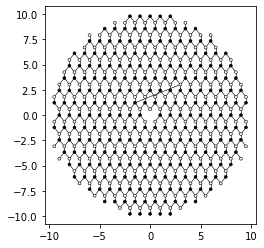

UserCodeError: Error occurred in user-supplied value function "potential".
See the upper part of the above backtrace for more information.

In [31]:
main()